# Fifa 17- Data analysis

In [158]:
import pandas as pd                                      # for reading data, exploring, cleaning, analysing and other reasons.
import numpy as np                                       # for mathematical fast calc. on data.
%matplotlib inline
import matplotlib.pyplot as plt                          # for plots
import seaborn as sns                                    # for different plots 
from sklearn.preprocessing import LabelEncoder, StandardScaler
#import time                                              # for time comparsion between different models
import re                                        # for a particular change needed: recognize the year & convert as a string 


## Data loading


In [159]:
df = pd.read_csv('Fifa_17_data/FullData.csv')                   # contains the data of players 
nat_namDF = pd.read_csv('Fifa_17_data/NationalNames.csv')          # national Names dataset
club_namDF = pd.read_csv('Fifa_17_data/ClubNames.csv')             # club names dataset
player_namDF = pd.read_csv('Fifa_17_data/PlayerNames.csv')         # player names data set

# Understanding the different tables


In [160]:
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [161]:
nat_namDF.head()

,Name,url
0,Spain,/team/1362/spain/
1,Germany,/team/1337/germany/
2,Brazil,/team/1370/brazil/
3,Belgium,/team/1325/belgium/
4,Argentina,/team/1369/argentina/


In [162]:
club_namDF.head()

,Name,url
0,FC Bayern,/team/21/fc-bayern/
1,Real Madrid,/team/243/real-madrid/
2,FC Barcelona,/team/241/fc-barcelona/
3,Juventus,/team/45/juventus/
4,Manchester Utd,/team/11/manchester-utd/


In [163]:
player_namDF.head()

,Name,url
0,Cristiano Ronaldo,/player/20801/cristiano-ronaldo/
1,Lionel Messi,/player/158023/lionel-messi/
2,Neymar,/player/190871/neymar/
3,Luis Suárez,/player/176580/luis-su%C3%A1rez/
4,Manuel Neuer,/player/167495/manuel-neuer/


In [164]:
df.shape                            #17588 rows, 53 cols.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

# Checking missing values

In [165]:
print(pd.isnull(df).sum()) 

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

In [166]:
# we will delete those columns with too many missing values. Besides, those variables will not be 
# very important for our analysis. 


# drop to delete columns
df2 = df.drop(['National_Position', 'National_Kit'], axis=1)


In [167]:
#Checking the column with the missing values 

idx = pd.isnull(df[['Club_Position','Club_Kit']]).any(axis = 1).nonzero()[0]
print(idx) 

[383]


In [168]:
#Seing that column
df2.iloc[383]

Name                  Didier Drogba
Nationality             Ivory Coast
Club                     Free agent
Club_Position                   NaN
Club_Kit                        NaN
Club_Joining                    NaN
Contract_Expiry                 NaN
Rating                           81
Height                       189 cm
Weight                        80 kg
Preffered_Foot                Right
Birth_Date               03/11/1978
Age                              39
Preffered_Position               ST
Work_Rate              Medium / Low
Weak_foot                         4
Skill_Moves                       3
Ball_Control                     80
Dribbling                        74
Marking                          22
Sliding_Tackle                   29
Standing_Tackle                  32
Aggression                       80
Reactions                        80
Attacking_Position               81
Interceptions                    42
Vision                           76
Composure                   

In [169]:
# As Drogba is a free agent, let's take a look at the values from other F.A. to decide how to fill in the values

Free_Agents = df2[df2.loc[:,'Club'] == 'Free Agents']
Free_Agents

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
151,Oscar,Brazil,Free Agents,Res,99.0,01/01/2017,2020.0,83,179 cm,67 kg,...,77,77,77,68,63,12,12,15,10,12
254,Axel Witsel,Belgium,Free Agents,Res,99.0,01/03/2017,2019.0,82,186 cm,73 kg,...,74,69,68,81,67,10,5,7,7,7
332,Paulinho,Brazil,Free Agents,Res,99.0,07/02/2015,2019.0,81,182 cm,77 kg,...,73,66,57,71,75,6,16,11,16,8
362,Renato Augusto,Brazil,Free Agents,Res,99.0,02/10/2016,2023.0,81,186 cm,85 kg,...,81,80,75,68,77,15,6,16,11,8
610,Gil,Brazil,Free Agents,Res,99.0,01/20/2016,2020.0,79,192 cm,84 kg,...,41,39,34,42,23,11,9,6,11,14
700,Burak Yılmaz,Turkey,Free Agents,Res,99.0,02/17/2016,2020.0,79,188 cm,81 kg,...,73,66,75,79,77,8,14,11,15,12
708,Miguel Almirón,Paraguay,Free Agents,Res,99.0,01/01/2017,2020.0,78,177 cm,61 kg,...,72,69,60,58,75,13,6,13,9,12
830,Balázs Dzsudzsák,Hungary,Free Agents,Res,99.0,08/07/2016,2018.0,78,179 cm,72 kg,...,83,84,85,85,73,7,10,14,7,10
832,Bořek Dočkal,Czech Republic,Free Agents,Res,99.0,08/13/2013,2020.0,78,182 cm,72 kg,...,82,82,80,75,72,11,10,14,9,8
876,Ezequiel Lavezzi,Argentina,Free Agents,Res,99.0,02/17/2016,2022.0,78,173 cm,75 kg,...,69,74,76,69,76,9,6,11,15,12


In [170]:
#Filling the missing values from that player manually

# F.A. cointains the players that are playing at one league which is not included in the game. Then, the values for 
# Joining and expiry are not so important and can be filled from the previous player. 
# On the other hand, the values for position and kit will be included by hand.

df2.loc[idx,'Club_Position'] = 'ST'
df2.loc[idx,'Club_Kit'] = 99.0
df2[['Club_Joining','Contract_Expiry']] =df[['Club_Joining','Contract_Expiry']].fillna(axis = 0,method='ffill',inplace = False)  #warning if inplace = True 

In [171]:
#Seing that column again
df2.iloc[383]

Name                  Didier Drogba
Nationality             Ivory Coast
Club                     Free agent
Club_Position                    ST
Club_Kit                         99
Club_Joining             08/19/2014
Contract_Expiry                2018
Rating                           81
Height                       189 cm
Weight                        80 kg
Preffered_Foot                Right
Birth_Date               03/11/1978
Age                              39
Preffered_Position               ST
Work_Rate              Medium / Low
Weak_foot                         4
Skill_Moves                       3
Ball_Control                     80
Dribbling                        74
Marking                          22
Sliding_Tackle                   29
Standing_Tackle                  32
Aggression                       80
Reactions                        80
Attacking_Position               81
Interceptions                    42
Vision                           76
Composure                   

In [172]:
#checking if there are more missing values

print(pd.isnull(df2).sum()) 

Name                  0
Nationality           0
Club                  0
Club_Position         0
Club_Kit              0
Club_Joining          0
Contract_Expiry       0
Rating                0
Height                0
Weight                0
Preffered_Foot        0
Birth_Date            0
Age                   0
Preffered_Position    0
Work_Rate             0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Speed                 0
Stamina               0
Strength              0
Balance               0
Agility               0
Jumping               0
Heading               0
Shot_Power            0
Finishing             0
Long_Shots      

# Changing Weight and Height to float

In [173]:
#Transform height and weight measures to float type
df2['Height'] = df2['Height'].str.extract("(?P<Height>\d+)")
df2['Weight'] = df2['Weight'].str.extract("(?P<Weight>\d+)")
df2.Height = df2.Height.astype(float)
df2.Weight = df2.Weight.astype(float)

C:\Users\rtyu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\rtyu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
#Now, we can get a description of the variables
df2.describe()

,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,17588.000000,17588.000000,17588.000000,17588.00000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,21.298954,2018.899363,66.166193,181.10547,75.253355,25.460314,2.934103,2.303161,57.972766,54.802877,...,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,19.172152,1.698753,7.083012,6.67516,6.897948,4.680217,0.655927,0.746156,16.834779,18.913857,...,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,2017.000000,45.000000,155.00000,48.000000,17.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,2017.000000,62.000000,176.00000,70.000000,22.000000,3.000000,2.000000,53.000000,47.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,18.000000,2019.000000,66.000000,181.00000,75.000000,25.000000,3.000000,2.000000,63.000000,60.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,27.000000,2020.000000,71.000000,186.00000,80.000000,29.000000,3.000000,3.000000,69.000000,68.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,99.000000,2023.000000,94.000000,207.00000,110.000000,47.000000,5.000000,5.000000,95.000000,97.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


In [175]:
df2.describe(include=['O']) 

,Name,Nationality,Club,Club_Position,Club_Joining,Preffered_Foot,Birth_Date,Preffered_Position,Work_Rate
count,17588,17588,17588,17588,17588,17588,17588,17588,17588
unique,17341,160,634,29,1677,2,6063,292,9
top,Felipe,England,Free Agents,Sub,07/01/2016,Right,02/29/1988,CB,Medium / Medium
freq,6,1618,232,7492,1193,13494,160,2181,9897


# Some plots to understand a little bit more of the variables

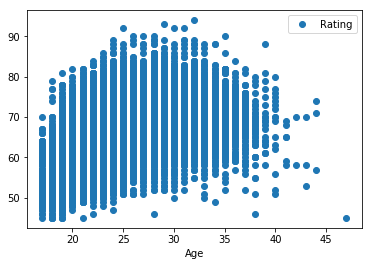

In [57]:
df2.plot(x='Age', y='Rating', style='o')

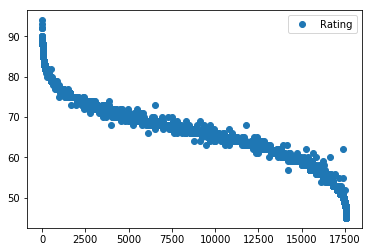

In [58]:
df2.plot( y='Rating', style='o')

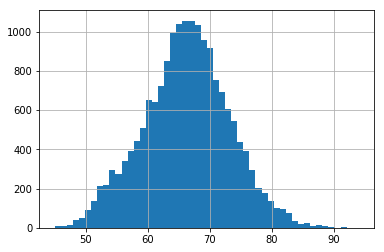

In [59]:
df2['Rating'].hist(bins=50)

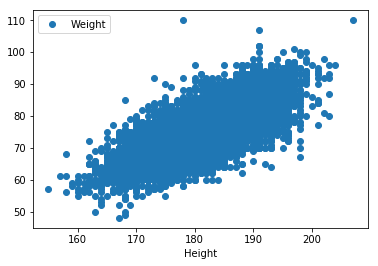

In [60]:
df2.plot(x='Height', y='Weight',style='o')

In [19]:
# creating a df with the main attr:

dfM = df[['Name', 'Rating', 'Height', 'Weight']]

In [20]:
dfM.head()

,Name,Rating,Height,Weight
0,Cristiano Ronaldo,94,185.0,80.0
1,Lionel Messi,93,170.0,72.0
2,Neymar,92,174.0,68.0
3,Luis Suárez,92,182.0,85.0
4,Manuel Neuer,92,193.0,92.0


# Selection

In [61]:
#select the heaviest players:
print("no. of players having weight >=100 in FIFA 17:")
print((df2.loc[:,'Weight'] > 99).sum())
print("Their Names: ")
heaviest_players = df2[df2.loc[:,'Weight']>99]
heaviest_players

no. of players having weight >=100 in FIFA 17:
11
Their Names: 


,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
1805,Bill Hamid,United States,D.C. United,GK,28.0,01/01/2009,2021.0,75,191.0,102.0,...,20,15,12,23,14,70,77,65,72,77
3541,Lars Unnerstall,Germany,F. Düsseldorf,Sub,19.0,07/01/2014,2017.0,72,198.0,100.0,...,12,13,11,16,15,69,69,65,71,75
5466,Carl Ikeme,Nigeria,Wolves,GK,1.0,07/01/2003,2019.0,70,191.0,100.0,...,14,12,12,25,15,69,72,69,70,68
7316,Chris Seitz,United States,FC Dallas,GK,18.0,01/01/2010,2020.0,68,191.0,107.0,...,14,16,14,18,12,72,69,71,61,68
8358,Kristof Van Hout,Belgium,KVC Westerlo,Sub,1.0,07/01/2015,2017.0,67,207.0,110.0,...,19,13,15,25,12,68,71,60,67,65
8764,Martin Polaček,Slovakia,Zagłębie Lubin,GK,1.0,07/10/2015,2018.0,66,199.0,100.0,...,17,11,17,18,12,68,68,78,58,62
11628,Adebayo Akinfenwa,England,Wycombe,ST,20.0,07/10/2016,2017.0,64,178.0,110.0,...,51,50,42,66,59,6,14,15,7,16
13128,Hakeem Araba,England,Falkenbergs FF,LS,18.0,02/27/2015,2021.0,62,191.0,102.0,...,58,37,39,62,62,14,9,12,15,14
15026,Rene Gilmartin,Republic of Ireland,Watford,Res,13.0,08/25/2014,2017.0,59,197.0,101.0,...,16,11,11,21,12,54,67,54,54,61
16481,Viljar Myhra,Norway,Odds BK,Sub,12.0,05/15/2014,2018.0,55,195.0,100.0,...,20,20,13,24,17,53,53,57,56,54


In [62]:
#Discarding the values of the goalkeepers

nonGK_h_p = heaviest_players.loc[heaviest_players['Club_Position'] != 'GK']
nonGK_h_p

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
3541,Lars Unnerstall,Germany,F. Düsseldorf,Sub,19.0,07/01/2014,2017.0,72,198.0,100.0,...,12,13,11,16,15,69,69,65,71,75
8358,Kristof Van Hout,Belgium,KVC Westerlo,Sub,1.0,07/01/2015,2017.0,67,207.0,110.0,...,19,13,15,25,12,68,71,60,67,65
11628,Adebayo Akinfenwa,England,Wycombe,ST,20.0,07/10/2016,2017.0,64,178.0,110.0,...,51,50,42,66,59,6,14,15,7,16
13128,Hakeem Araba,England,Falkenbergs FF,LS,18.0,02/27/2015,2021.0,62,191.0,102.0,...,58,37,39,62,62,14,9,12,15,14
15026,Rene Gilmartin,Republic of Ireland,Watford,Res,13.0,08/25/2014,2017.0,59,197.0,101.0,...,16,11,11,21,12,54,67,54,54,61
16481,Viljar Myhra,Norway,Odds BK,Sub,12.0,05/15/2014,2018.0,55,195.0,100.0,...,20,20,13,24,17,53,53,57,56,54
16824,Evan Louro,United States,NY Red Bulls,Res,45.0,01/23/2017,2020.0,53,191.0,102.0,...,19,16,18,15,19,47,53,59,52,57


In [63]:
#Discarding the values of the players taller than 1,95m

h_p_short = heaviest_players.loc[heaviest_players['Height'] < 195]
h_p_short

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
1805,Bill Hamid,United States,D.C. United,GK,28.0,01/01/2009,2021.0,75,191.0,102.0,...,20,15,12,23,14,70,77,65,72,77
5466,Carl Ikeme,Nigeria,Wolves,GK,1.0,07/01/2003,2019.0,70,191.0,100.0,...,14,12,12,25,15,69,72,69,70,68
7316,Chris Seitz,United States,FC Dallas,GK,18.0,01/01/2010,2020.0,68,191.0,107.0,...,14,16,14,18,12,72,69,71,61,68
11628,Adebayo Akinfenwa,England,Wycombe,ST,20.0,07/10/2016,2017.0,64,178.0,110.0,...,51,50,42,66,59,6,14,15,7,16
13128,Hakeem Araba,England,Falkenbergs FF,LS,18.0,02/27/2015,2021.0,62,191.0,102.0,...,58,37,39,62,62,14,9,12,15,14
16824,Evan Louro,United States,NY Red Bulls,Res,45.0,01/23/2017,2020.0,53,191.0,102.0,...,19,16,18,15,19,47,53,59,52,57


# Goalkeepers

In [64]:
GKdf = df2.loc[df2['Club_Position'] == 'GK']
GKdf

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193.0,92.0,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193.0,82.0,...,12,21,19,40,13,86,88,87,85,90
9,Thibaut Courtois,Belgium,Chelsea,GK,13.0,07/26/2011,2019.0,89,199.0,91.0,...,17,19,11,27,12,86,84,69,91,89
26,Hugo Lloris,France,Spurs,GK,1.0,08/01/2012,2022.0,88,188.0,82.0,...,14,11,10,40,11,82,87,68,87,90
30,Petr Čech,Czech Republic,Arsenal,GK,33.0,06/29/2015,2019.0,88,196.0,90.0,...,11,13,19,23,17,85,83,77,90,85
31,Gianluigi Buffon,Italy,Juventus,GK,1.0,07/01/2001,2018.0,88,192.0,91.0,...,13,20,13,22,17,90,87,68,88,84
33,Jan Oblak,Slovenia,Atlético Madrid,GK,13.0,07/17/2014,2021.0,87,189.0,87.0,...,12,13,14,11,13,87,83,77,90,82
40,Samir Handanovič,Slovenia,Inter,GK,1.0,07/01/2012,2019.0,87,193.0,89.0,...,19,12,14,23,12,86,86,69,89,86
47,Bernd Leno,Germany,Bayer 04,GK,1.0,01/01/2012,2018.0,86,190.0,83.0,...,14,9,8,23,10,85,85,76,86,83
67,Keylor Navas,Costa Rica,Real Madrid,GK,1.0,08/04/2014,2020.0,85,185.0,78.0,...,13,11,15,25,11,80,87,72,82,85


In [65]:
GKdf.describe()

,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.0,632.00000,632.000000,...,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,13.329114,2018.740506,69.825949,188.412975,83.006329,28.819620,2.568038,1.0,20.97943,14.740506,...,14.449367,15.212025,15.455696,22.045886,14.166139,68.731013,70.142405,65.553797,67.583861,71.354430
std,17.313440,1.629484,6.651484,4.558688,6.004749,4.748081,0.667415,0.0,5.77589,4.327966,...,4.332163,4.948481,6.386242,8.303825,4.287149,7.314561,6.905427,7.820507,7.534133,7.271572
min,1.000000,2017.000000,52.000000,172.000000,64.000000,18.000000,1.000000,1.0,5.00000,5.000000,...,5.000000,6.000000,5.000000,9.000000,5.000000,48.000000,52.000000,40.000000,45.000000,48.000000
25%,1.000000,2017.000000,65.000000,185.000000,79.000000,25.000000,2.000000,1.0,17.00000,12.000000,...,12.000000,12.000000,12.000000,17.000000,12.000000,64.000000,65.000000,61.000000,62.000000,67.000000
50%,1.000000,2018.000000,69.000000,188.000000,83.000000,29.000000,3.000000,1.0,21.00000,14.000000,...,14.000000,14.000000,14.000000,22.000000,14.000000,68.000000,70.000000,65.000000,68.000000,71.000000
75%,23.000000,2020.000000,74.000000,191.000000,87.000000,32.000000,3.000000,1.0,23.00000,17.000000,...,17.000000,17.000000,18.000000,24.000000,16.000000,74.000000,75.000000,70.000000,73.000000,76.000000
max,99.000000,2023.000000,92.000000,202.000000,107.000000,44.000000,5.000000,1.0,51.00000,39.000000,...,39.000000,65.000000,71.000000,75.000000,35.000000,91.000000,89.000000,95.000000,91.000000,90.000000


## We wonder if there is any correlation between the Height and the rating of a GK

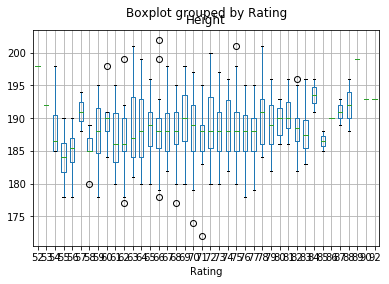

In [68]:
GKdf.boxplot('Height', 'Rating')

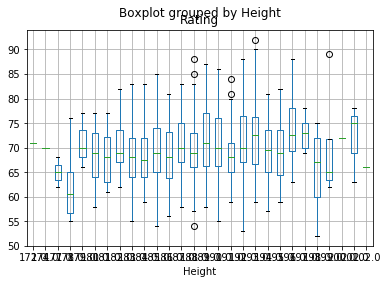

In [69]:
GKdf.boxplot('Rating', 'Height')

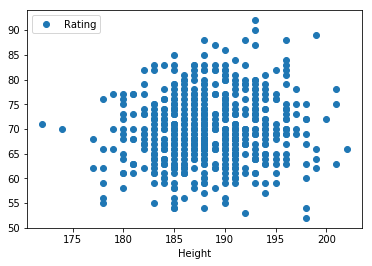

In [28]:
GKdf.plot(x='Height', y='Rating',style='o')

## To have a better understanding...
Let us plot the corelation using a heatmap

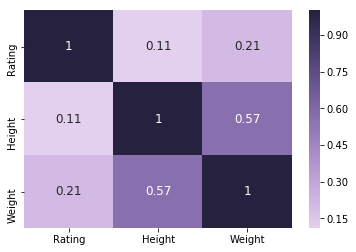

In [72]:
GKdfM = GKdf[['Name', 'Rating', 'Height', 'Weight']]

corr = GKdfM.corr()
sns.heatmap(corr,
           cmap = sns.cubehelix_palette(start = 0,rot=0.1,as_cmap = True),
           annot = True,
            annot_kws={'fontsize':12},
            cbar = True
           )

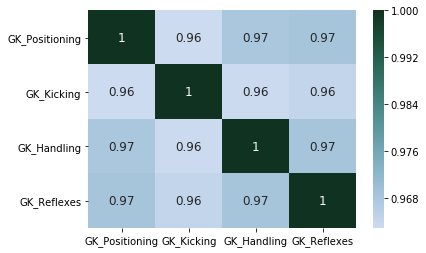

In [73]:
#Checking for correlations between the GK variables

GK_attributes = df2[['GK_Positioning','GK_Kicking','GK_Handling','GK_Reflexes']]
corr = GK_attributes.corr()
sns.heatmap(corr,cmap = sns.cubehelix_palette(start = -1,rot = 0.3,as_cmap = True),annot = True,
            annot_kws={'fontsize':12}) 

# Creating  a new variable: years at the club

In [100]:
# We just keep the players with 80 or above rating
df2_Best = df2[df2['Rating'] > 80]

In [101]:
df2_Best['Time_at_Club'] = df2_Best['Club_Joining'] # Only the first time
#int(re.findall("(\d{4})", df2['Time_at_Club'][17500])[0])

C:\Users\rtyu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df2_Best

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Time_at_Club
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,80.0,...,81,76,85,88,14,7,15,11,11,07/01/2009
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,72.0,...,89,90,74,85,14,6,15,11,8,07/01/2004
2,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,68.0,...,79,84,81,83,15,9,15,9,11,07/01/2013
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,85.0,...,86,84,85,88,33,27,31,25,37,07/11/2014
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193.0,92.0,...,14,11,47,11,91,89,95,90,89,07/01/2011
5,De Gea,Spain,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193.0,82.0,...,21,19,40,13,86,88,87,85,90,07/01/2011
6,Robert Lewandowski,Poland,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,79.0,...,77,76,81,86,8,15,12,6,10,07/01/2014
7,Gareth Bale,Wales,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183.0,74.0,...,86,85,76,76,5,15,11,15,6,09/02/2013
8,Zlatan Ibrahimović,Sweden,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195.0,95.0,...,82,82,91,93,9,13,10,15,12,07/01/2016
9,Thibaut Courtois,Belgium,Chelsea,GK,13.0,07/26/2011,2019.0,89,199.0,91.0,...,19,11,27,12,86,84,69,91,89,07/26/2011


In [105]:
# Creating a variable: time at the club
for i in range(0,len(df2_Best)):
    df2_Best['Time_at_Club'][i] = 2017 - int(re.findall("(\d{4})", df2_Best['Club_Joining'][i])[0])

C:\Users\rtyu_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rtyu_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: 306

In [106]:
#Some values were not transformed correctly: skip those values
df2_Best = df2_Best.iloc[:][0:306]

In [107]:
df2_Best

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Time_at_Club
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,80.0,...,81,76,85,88,14,7,15,11,11,8
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,72.0,...,89,90,74,85,14,6,15,11,8,13
2,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,68.0,...,79,84,81,83,15,9,15,9,11,4
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,85.0,...,86,84,85,88,33,27,31,25,37,3
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193.0,92.0,...,14,11,47,11,91,89,95,90,89,6
5,De Gea,Spain,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193.0,82.0,...,21,19,40,13,86,88,87,85,90,6
6,Robert Lewandowski,Poland,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,79.0,...,77,76,81,86,8,15,12,6,10,3
7,Gareth Bale,Wales,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183.0,74.0,...,86,85,76,76,5,15,11,15,6,4
8,Zlatan Ibrahimović,Sweden,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195.0,95.0,...,82,82,91,93,9,13,10,15,12,1
9,Thibaut Courtois,Belgium,Chelsea,GK,13.0,07/26/2011,2019.0,89,199.0,91.0,...,19,11,27,12,86,84,69,91,89,6


In [97]:
df2_Best['Time_at_Club'].describe()

count     306
unique     16
top         2
freq       57
Name: Time_at_Club, dtype: int64

In [108]:
#Creating a table for those players who were more than 12 y at their club
df2_club = df2_Best[df2_Best['Time_at_Club'] > 12]

In [109]:
df2_club

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Time_at_Club
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,72.0,...,89,90,74,85,14,6,15,11,8,13
28,Philipp Lahm,Germany,FC Bayern,RB,21.0,11/01/2002,2018.0,88,170.0,66.0,...,77,59,69,66,14,11,5,12,5,15
31,Gianluigi Buffon,Italy,Juventus,GK,1.0,07/01/2001,2018.0,88,192.0,91.0,...,20,13,22,17,90,87,68,88,84,16
32,Iniesta,Spain,FC Barcelona,LM,8.0,07/01/2002,2018.0,88,171.0,68.0,...,80,70,71,74,13,6,6,13,7,15
188,Wayne Rooney,England,Manchester Utd,Sub,10.0,08/31/2004,2019.0,83,176.0,83.0,...,84,81,79,85,8,10,13,11,7,13
189,Daniele De Rossi,Italy,Roma,RCM,16.0,07/01/2002,2017.0,83,184.0,83.0,...,62,71,75,74,10,10,13,7,9,15
267,Loïc Perrin,France,AS Saint-Étienne,LCB,24.0,12/10/2004,2018.0,82,181.0,80.0,...,59,51,68,44,11,6,12,7,14,13


# Count the countries of the best players

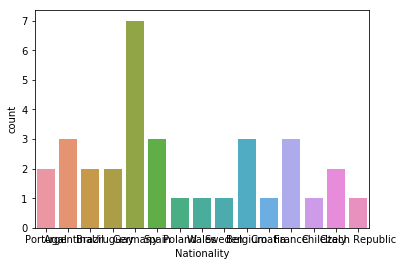

In [124]:
df2_veryBest = df2[df2['Rating']>87]
#df2_veryBest = df2_veryBest[df2_veryBest['Rating']<90]
sns.countplot(x='Nationality',data = df2_veryBest)


In [130]:
# numerical data only--- video data mining: cluster--- bart poulson

df2_num = df2[df2.columns[2:]]
df2.index = df2.iloc[:,1]

df2_num = df2_num.drop(['Work_Rate'], axis=1)
### 



####


In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df2_num, 'ward')

ValueError: could not convert string to float: 'GK'

In [176]:

df2_num = df2[['Rating', 'Height', 'Weight', 'Skill_Moves' ]]
df2_num 

,Rating,Height,Weight,Skill_Moves
0,94,185.0,80.0,5
1,93,170.0,72.0,4
2,92,174.0,68.0,5
3,92,182.0,85.0,4
4,92,193.0,92.0,1
5,90,193.0,82.0,1
6,90,185.0,79.0,3
7,90,183.0,74.0,4
8,90,195.0,95.0,4
9,89,199.0,91.0,1


In [157]:
df2

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Nationality,,,,,,,,,,,,,,,,,,,,,
Portugal,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,80.0,...,90,81,76,85,88,14,7,15,11,11
Argentina,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,72.0,...,88,89,90,74,85,14,6,15,11,8
Brazil,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,68.0,...,77,79,84,81,83,15,9,15,9,11
Uruguay,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,85.0,...,86,86,84,85,88,33,27,31,25,37
Germany,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193.0,92.0,...,16,14,11,47,11,91,89,95,90,89
Spain,De Gea,Spain,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193.0,82.0,...,12,21,19,40,13,86,88,87,85,90
Poland,Robert Lewandowski,Poland,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,79.0,...,82,77,76,81,86,8,15,12,6,10
Wales,Gareth Bale,Wales,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183.0,74.0,...,90,86,85,76,76,5,15,11,15,6
Sweden,Zlatan Ibrahimović,Sweden,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195.0,95.0,...,88,82,82,91,93,9,13,10,15,12
